In [73]:
import networkx as nx
import time
from matplotlib import pyplot as plt

In [2]:
start_time = time.time()
dvd = nx.read_gml("amazon-dvd.gml")
print("--- %2.f seconds to read gml file ---" % (time.time() - start_time))


In [82]:
#ego_sample=nx.ego_graph(dvd, 'B000056N8P', radius=2)
ego_sample=nx.ego_graph(dvd, 'B000055WDG', radius=2)
print(ego_sample)

Graph with 34 nodes and 33 edges


In [89]:
colors_dict = nx.get_node_attributes(ego_sample, 'type') 
#print(colors_dict.values())

colors = []
color_map = { 'reviewer' : "#B2FF9E", 'product' : "#607466" }

for k in colors_dict:
    #print(colors_dict[k])
    colors.append(color_map[colors_dict[k]])



--- 0.02 seconds to draw ---


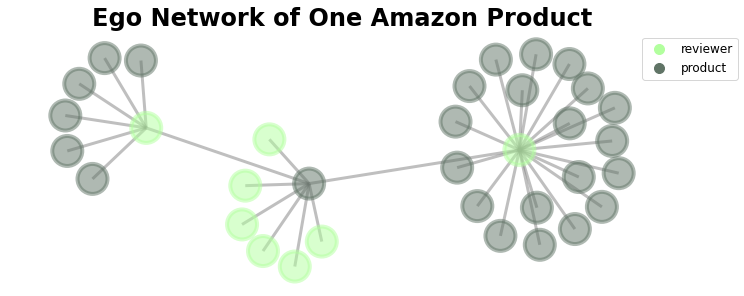

In [95]:
start_time = time.time()

plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.set_aspect('equal')

nx.draw(ego_sample,
        font_size=18,
        font_weight="bold",
        font_color="black",
        node_size=900, 
        node_color=colors,
        edge_color="grey",
        node_shape="o", 
        alpha=0.5, 
        linewidths=4, 
        width=3)


print("--- %.2f seconds to draw ---" % (time.time() - start_time))


legend_colors = list(color_map.values())
legend_texts = list(color_map.keys())

patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=legend_colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(legend_texts)) ]
plt.legend(
           handles=patches, 
           ncol=1, 
           numpoints=1, 
           fontsize = 12, 
           loc="upper right",
           bbox_to_anchor=(1.1, 1)
          )

plt.title("Ego Network of One Amazon Product", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, loc='center')

plt.show()

